# Outcome index

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns; sns.set()
from datetime import datetime
import matplotlib.pyplot as plt
import json

In [2]:
with open('C:/Users/Taha/Desktop/performance_2020_05_06.json', 'rb')\
    as data: data = json.load(data, encoding='utf8')

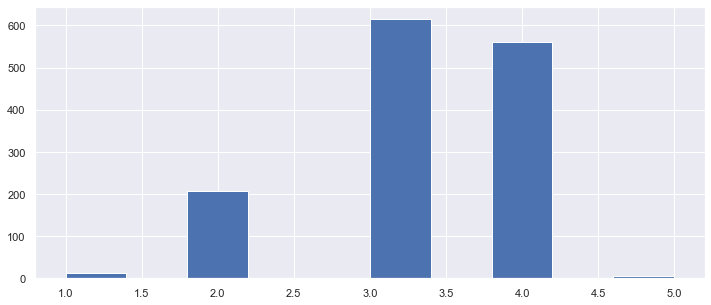

In [3]:
scores = []
for i in range(len(data)):
    scores.append(data[i]['score'])

scores = [i for i in scores if type(i) is float]
plt.figure(figsize=(12, 5))
plt.hist(scores)
plt.show()

In [36]:
# select all unique HC/LO

pd.DataFrame(pd.DataFrame(data)['hc-item-id'].value_counts()).rename(columns={'hc-item-id': 'count'})

,count
803.0,22
784.0,20
865.0,19
851.0,17
862.0,15
...,...
3744.0,1
3600.0,1
1020.0,1
1012.0,1


In [46]:
# select all unique assignments

pd.DataFrame(pd.DataFrame(data)['assignment-id'].value_counts()).rename(columns={'assignment-id': 'count'})

,count
51832.0,26
45235.0,25
30125.0,25
51863.0,24
37106.0,22
...,...
46151.0,1
46872.0,1
36141.0,1
31604.0,1


In [19]:
# Select the grades based on the type of grading

pd.DataFrame(pd.DataFrame(data)['type'].value_counts()).rename(columns={'type': 'count'})

,count
assignment,1045
poll,583
video,136


In [47]:
# select all unique professors

pd.DataFrame(pd.DataFrame(data)['grader-user-id']\
             .value_counts()).rename(columns={'grader-user-id': 'count'}).head(10)

,count
9,215
1292,138
9138,126
605,119
1061,115
610,106
1062,103
1027,83
9136,76
1290,72


In [44]:
# The proportion of grade done blindly

counter = 0
for i in range(len(data)):
    if data[i]['graded-blindly']: counter+=1
print("{0:.2%}".format(counter / len(data)))

13.89%


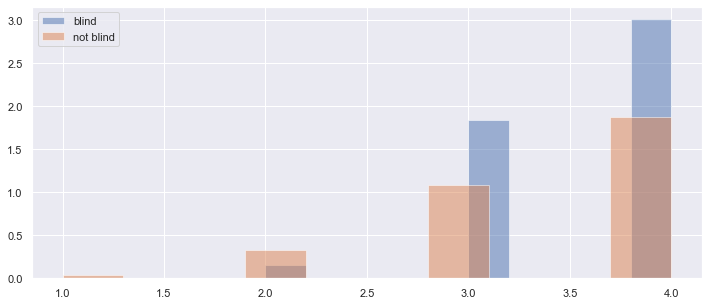

In [41]:
# Distribution of grades done either blindly or not blindly

bias_test = []
for i in range(len(data)):
    if data[i]['grader-user'] == 9:
        bias_test.append(data[i])
        
blind = [i['score'] for i in bias_test if i['graded-blindly']]
not_blind = [i['score'] for i in bias_test if not i['graded-blindly']]

plt.figure(figsize=(12, 5))
plt.hist([i for i in blind if type(i) is float], alpha=.5, label='blind', density=True)
plt.hist([i for i in not_blind if type(i) is float], alpha=.5, label='not blind', density=True)
plt.legend(); plt.show()